In [1]:
# 3개층으로 신경망으로 MNIST 데이터를 학습하는 코드

import numpy as np
# 시그모이드 함수 expit() 사용을 위해 scipy.special 불러오기
import scipy.special
# 행렬을 시각화하기 위한 라이브러리
import matplotlib.pyplot
# 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

In [2]:
# 신경망 클래스의 정의
class neuralNetwork:
    
    # 신경망 초기화하기 - 입력, 은닉, 출력 노드의 수 설정
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬 wid와 who
        # 배열 내 가중치는 w_i_i로 표기. 노드 i에서 다음 계층의 노드 j로 여녈됨을 의미
        # w11 w21
        # w12 w22 등
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # 신경망 학습시키기 - 학습 데이터들을 통해 학습하고 이에 따라 가중치를 업데이트
    def train(self, inputs_list, targets_list):
        
        # 입력 리스트를 2차원의 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)

        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제값 - 계산값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기 - 입력을 받아 연산한 후 출력 노드에서 답을 전달
    def query(self, inputs_list):
        
        # 입력 리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [3]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률은 0.3으로 정의
learning_rate = 0.3

# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# MNIST 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open('./mnist_train_100.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()

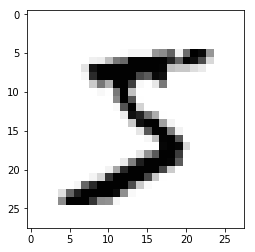

In [5]:
all_values = training_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

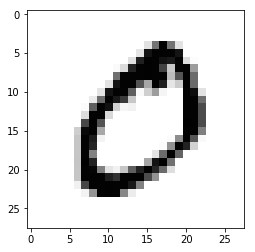

In [6]:
all_values = training_data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [7]:
# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 2

for e in range(epochs): 
    # 학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        # 입력 값의 범위와 값 조정
        inputs = (np.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
        # 결과값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [8]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01])

In [9]:
targets[int(all_values[0])] = 0.99

In [10]:
targets

array([ 0.01,  0.99,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01])

In [11]:
scaled_input = np.asfarray(all_values[1:])

In [12]:
scaled_input

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [13]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [14]:
scaled_input

array([ 0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01

In [15]:
# 테스트 데이터 불러오기
test_data_file = open('./mnist_test_10.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [16]:
# 첫번째 테스트 데이터 불러오기
all_values = test_data_list[0].split(',')
print(all_values)

['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [17]:
# 첫번째 테스트 데이터의 라벨만 보기
print(all_values[0])

7


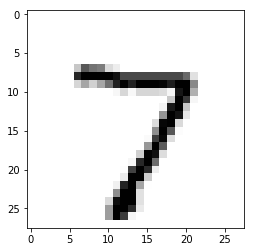

In [18]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [19]:
n.query((np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

array([[ 0.04092069],
       [ 0.01481431],
       [ 0.05674127],
       [ 0.0553971 ],
       [ 0.05172703],
       [ 0.01225153],
       [ 0.00219535],
       [ 0.89449118],
       [ 0.01609004],
       [ 0.01241407]])

In [20]:
# 신경망 테스트

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탑색

for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 정답은 첫 번째 값
    correct_label = int(all_values[0])
    # print("correct lable", correct_label)
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    # print("network's answer :", label)
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        # 정답인 경우 성적표에 1을 넣음
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 넣음
        scorecard.append(0)
        pass
    pass

In [21]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asarray(scorecard)
print("performace = ", scorecard_array.sum() / scorecard_array.size )

performace =  0.6


In [22]:
# MNIST 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open('./mnist_train.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [23]:
# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 2

for e in range(epochs): 
    # 학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        # 입력 값의 범위와 값 조정
        inputs = (np.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
        # 결과값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [24]:
# 테스트 데이터 불러오기
test_data_file = open('./mnist_test.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [25]:
# 신경망 테스트

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탑색

for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 정답은 첫 번째 값
    correct_label = int(all_values[0])
    # print("correct lable", correct_label)
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    # print("network's answer :", label)
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        # 정답인 경우 성적표에 1을 넣음
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 넣음
        scorecard.append(0)
        pass
    pass

In [26]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asarray(scorecard)
print("performace = ", scorecard_array.sum() / scorecard_array.size )

performace =  0.9511
